# FDA HW4
-----

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model, metrics, model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

### Load Data
* dataset: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset
* Attribution Information: 
    * **Administrative**, **Administrative Duration**, **Informational**, **Informational Duration**, **Product Related**, **Product Related Duration**
        * represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
    * **Bounce Rate**
        * feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
    * **Exit Rate**
        * feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
    * **Page Value**
        * feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
    * **Special Day**
        * feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.
        * The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
    * **Visitor Type**
        * the visitor is returning or new visitor.
    * **Weekend**
        * a Boolean value indicating whether the date of the visit is weekend
    * **Month**
        * month of the year.
    * The dataset also includes **operating system**, **browser**, **region**, **traffic type**

In [2]:
pd_data=pd.read_csv(u'./online_shoppers_intention.csv')
pd_data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Preprocess Data

### convert string data to integer data

- deal Month

In [3]:
pd_data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [4]:
Month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
pd_data['Month'] = pd_data['Month'].map(Month_map)

pd_data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False


- deal VisitorType

In [5]:
pd_data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [6]:
VisitorType_map = {'Returning_Visitor':0, 'New_Visitor':1, 'Other':2}
pd_data['VisitorType'] = pd_data['VisitorType'].map(VisitorType_map)

pd_data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,1,1,1,1,0,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,2,1,2,0,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,4,1,9,3,0,False,False


- deal Weekend

In [7]:
pd_data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [8]:
Weekend_map = {False:0, True:1}
pd_data['Weekend'] = pd_data['Weekend'].map(Weekend_map)

pd_data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,1,1,1,1,0,0,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,2,1,2,0,0,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,4,1,9,3,0,0,False


- deal Revenue

In [9]:
pd_data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [10]:
Revenue_map = {False:0, True:1}
pd_data['Revenue'] = pd_data['Revenue'].map(Revenue_map)

pd_data.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,4,1,9,3,0,0,0


## Define a reasonable problem
* predict the costomer revenue or not?(True or False)

## Analyze the Data

In [11]:
# describe the data
pd_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,0.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


### draw heat map of this data
* We can find **page values** have the highest relation with Revenue(0.49).
* **Administrative**, **Product Related**, **Product Related Duration**, **Bounced Rate**, **Exit Rate**, **Month**, **Visitor Type** are also have high relation with Revenue.

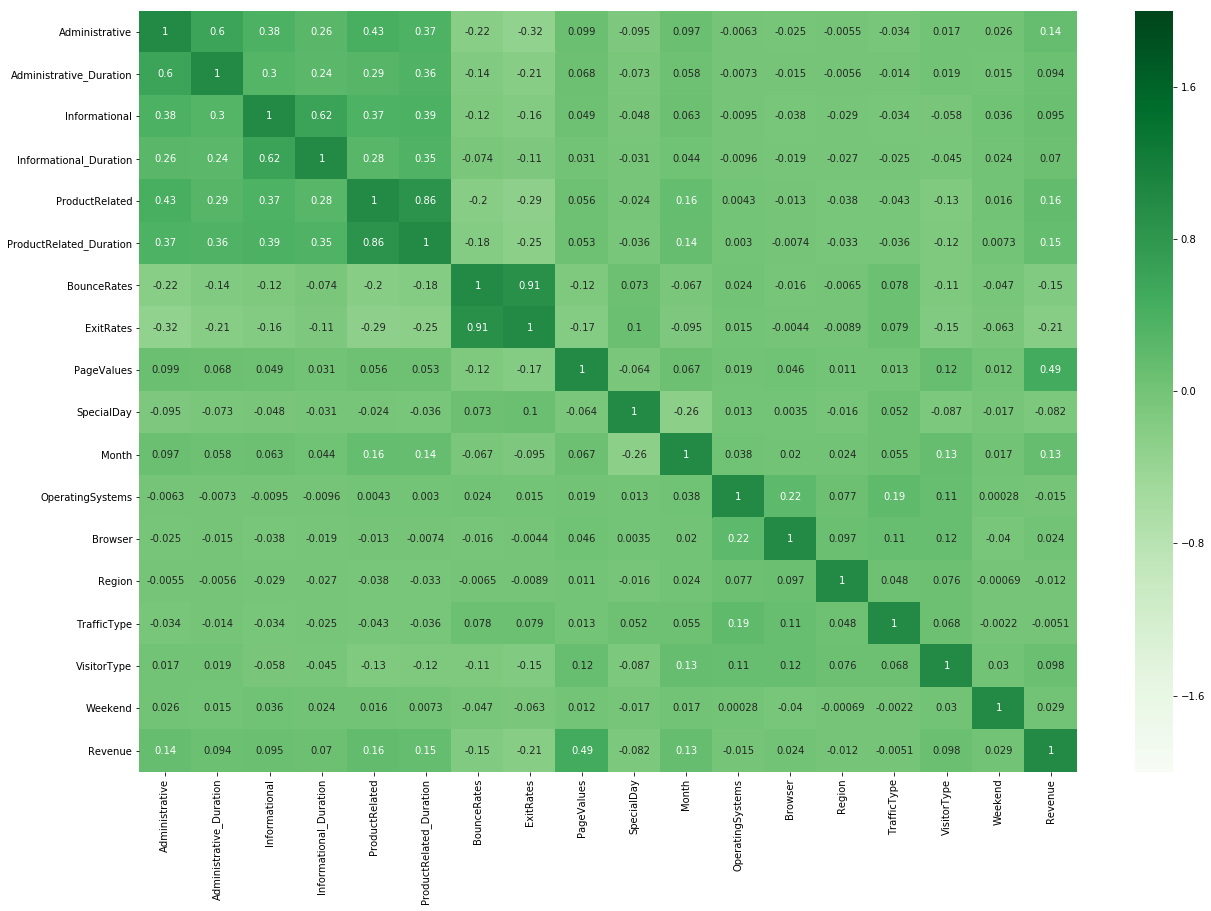

In [12]:
plt.rcParams['figure.figsize'] = (21, 14)
sns.heatmap(pd_data.corr(),vmin=-2,vmax=2,annot=True, cmap="Greens")

### Draw bar graph of attributes with high relation with Revenue

* **Page Values**: most of the data' Revenue can be classified by Page Value(when Page Values = 0, most of the Revenue is False, but When Page Values >0, most of the Revenue is True)

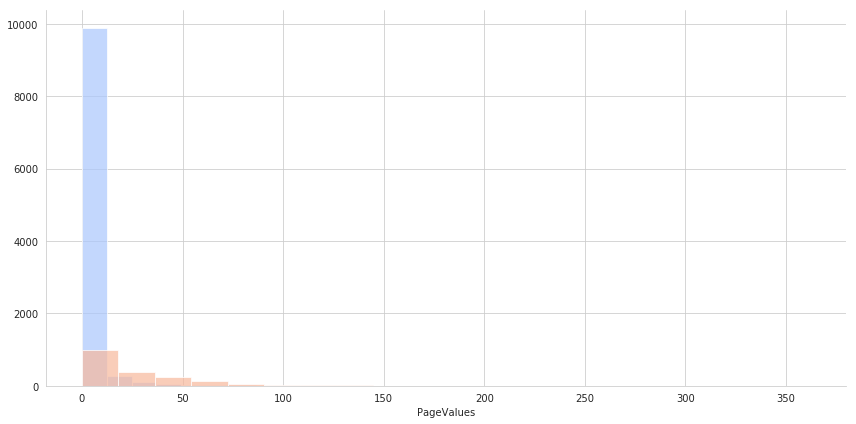

In [13]:
sns.set_style('whitegrid')
g = sns.FacetGrid(pd_data,hue="Revenue",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'PageValues',bins=20,alpha=0.7)

* **Administrative**: this attributes cannot classied data well(When Administrative grows, the number of True and False of Revenue are both decend)

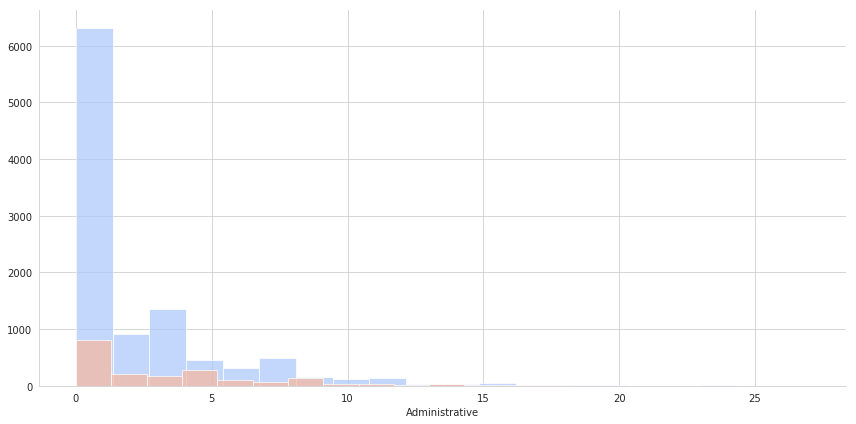

In [14]:
sns.set_style('whitegrid')
g = sns.FacetGrid(pd_data,hue="Revenue",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Administrative',bins=20,alpha=0.7)

* **Product Related**: this attributes cannot classied data well(When ProductRelated grows, the number of True and False of Revenue are both decend)

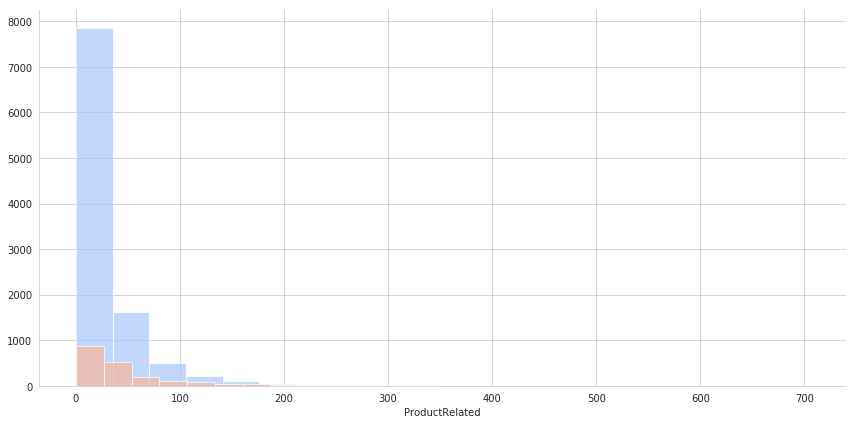

In [15]:
sns.set_style('whitegrid')
g = sns.FacetGrid(pd_data,hue="Revenue",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'ProductRelated',bins=20,alpha=0.7)

* **Product Related Duration**: this attributes cannot classied data well(When ProductRelated_Duration grows, the number of True and False of Revenue are both decend)

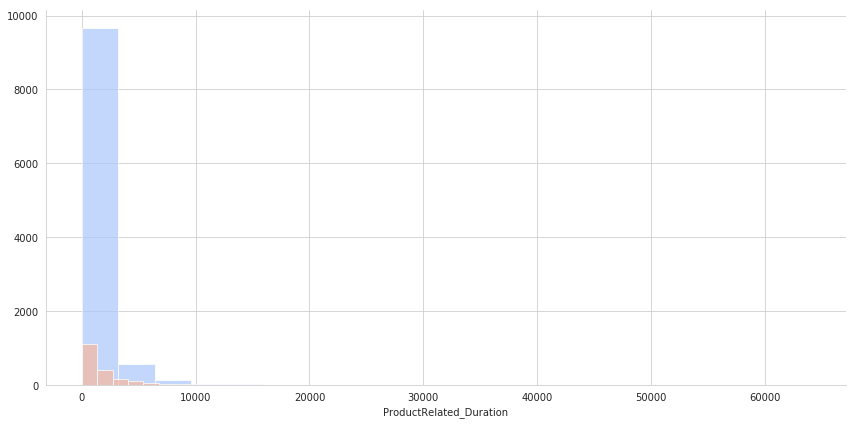

In [16]:
sns.set_style('whitegrid')
g = sns.FacetGrid(pd_data,hue="Revenue",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'ProductRelated_Duration',bins=20,alpha=0.7)

* **Bounce Rates**: when BounceRates > 0.025, the Revenue is all False

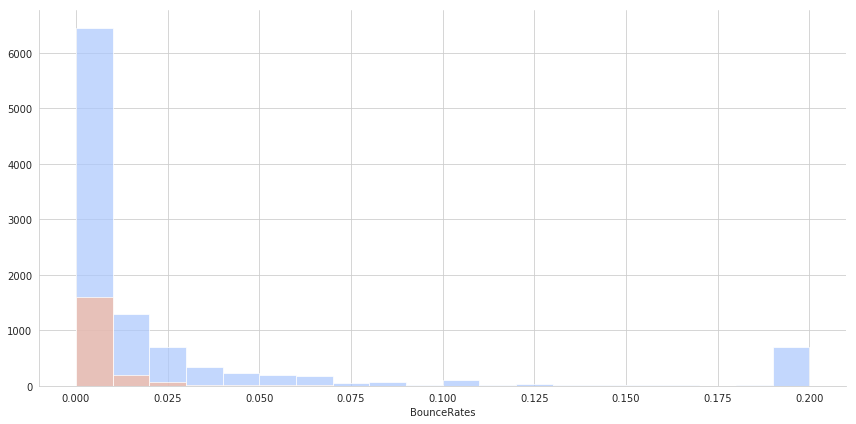

In [17]:
sns.set_style('whitegrid')
g = sns.FacetGrid(pd_data,hue="Revenue",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'BounceRates',bins=20,alpha=0.7)

* **Exit Rates**: when ExitRates > 0.075, the Revenue is all False

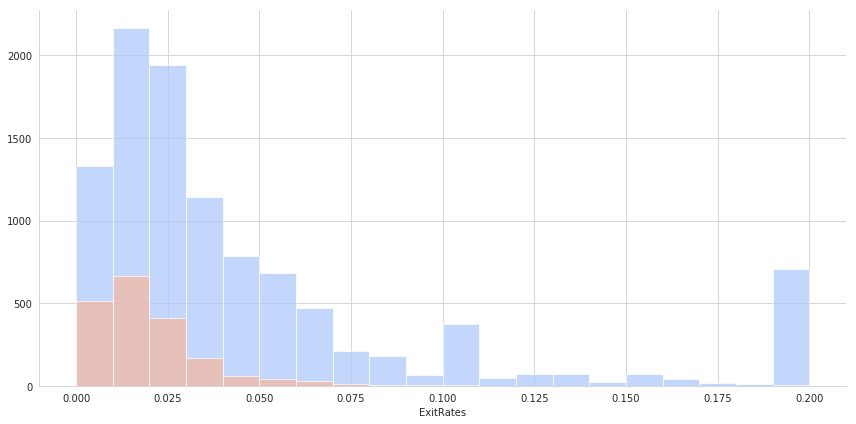

In [18]:
sns.set_style('whitegrid')
g = sns.FacetGrid(pd_data,hue="Revenue",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'ExitRates',bins=20,alpha=0.7)

* **Month**: this attributes cannot classied data well

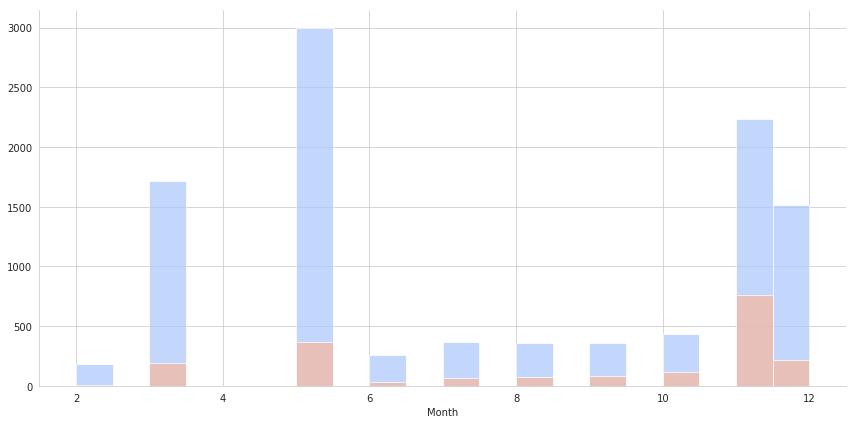

In [19]:
sns.set_style('whitegrid')
g = sns.FacetGrid(pd_data,hue="Revenue",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Month',bins=20,alpha=0.7)

* **Visitor Type**: from this graph, I know that this attribute has low abilitity to classoied data

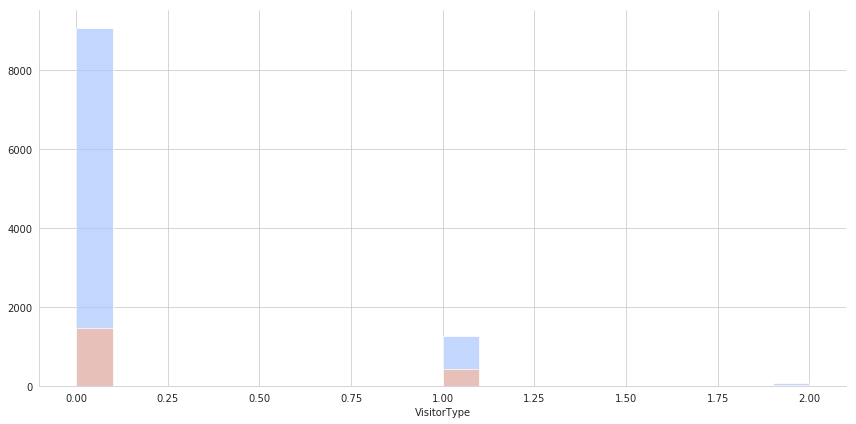

In [20]:
sns.set_style('whitegrid')
g = sns.FacetGrid(pd_data,hue="Revenue",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'VisitorType',bins=20,alpha=0.7)

### Drop useless attributes
Because the heat map above shows that some attribues have high relation with Revenue, I decided to keep these attributes as my original data to predict the Revenue is True or False.

In [21]:
pd_data = pd_data.drop(['Administrative_Duration'], axis=1)
pd_data = pd_data.drop(['Informational'], axis=1)
pd_data = pd_data.drop(['Informational_Duration'], axis=1)
pd_data = pd_data.drop(['SpecialDay'], axis=1)
pd_data = pd_data.drop(['OperatingSystems'], axis=1)
pd_data = pd_data.drop(['Browser'], axis=1)
pd_data = pd_data.drop(['Region'], axis=1)
pd_data = pd_data.drop(['TrafficType'], axis=1)
pd_data = pd_data.drop(['Weekend'], axis=1)
pd_data.head(3)

,Administrative,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,VisitorType,Revenue
0,0,1,0.0,0.2,0.2,0.0,2,0,0
1,0,2,64.0,0.0,0.1,0.0,2,0,0
2,0,1,0.0,0.2,0.2,0.0,2,0,0


### Split data to train and test data
* pd_train: 0~9999
* pd_test : 10000~12330

In [22]:
pd_train = pd_data[:10000]
pd_test = pd_data[10000:]

### Split x_train, y_train and x_test, y_test

In [23]:
# Split training data
y_train = pd_train['Revenue']
x_train = pd_train.drop(['Revenue'], axis=1)

# Split testing data
y_test = pd_test['Revenue']
x_test = pd_test.drop(['Revenue'], axis=1)

### Standarize the data

In [24]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

/home/chienchia/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/chienchia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/home/chienchia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


## Predict result - Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='liblinear').fit(x_train_std, y_train)
test_std_preds = clf.predict(x_test_std)
test_acc = accuracy_score(y_test, test_std_preds)*100
print('Test accuracy: %.2f %%' % test_acc)

Test accuracy: 84.59 %


## Improvement

### 1. Drop more useless attributes
Form the Analyzation above, important attributes which heat map shows are not all important.

The above analyze of attributes' relation with Revenue shows only **PageValues**, **BounceRates**, and **ExitRates** are able to classify data well.

so, I decide to use only these attributes to predict.

But, the accuracy decline a little...

Hmmm... I guess that attributes which I dropped may have a little influence on Revenue, they are not actually useless, so the accruacy decline a little.

In [26]:
# Drop useless attributes
pd = pd_data.drop(['Administrative'], axis=1)
pd = pd.drop(['ProductRelated'], axis=1)
pd = pd.drop(['ProductRelated_Duration'], axis=1)
pd = pd.drop(['Month'], axis=1)
pd = pd.drop(['VisitorType'], axis=1)

# Split data to train and test data
pd_train = pd[:10000]
pd_test = pd[10000:]

# Split training data
Y_train = pd_train['Revenue']
X_train = pd_train.drop(['Revenue'], axis=1)

# Split testing data
Y_test = pd_test['Revenue']
X_test = pd_test.drop(['Revenue'], axis=1)

# Standarize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Predict
clf = LogisticRegression(random_state=0, solver='liblinear').fit(X_train_std, Y_train)
test_std_preds = clf.predict(X_test_std)
test_acc = accuracy_score(Y_test, test_std_preds)*100
print('Test accuracy: %.2f %%' % test_acc)

Test accuracy: 83.69 %


### 2. use Gradient Descent Model to improve
Hmmm, the accuracy is equal to the use of Original Logistic Regression...

In [27]:
model_SGD = linear_model.SGDClassifier(loss='log', max_iter=10000, tol=-np.infty)
model_SGD.fit(x_train_std, y_train)

test_preds = model_SGD.predict(x_test_std)
test_acc = accuracy_score(y_test, test_preds)*100
print('Test accuracy: %.2f %%' % test_acc)

Test accuracy: 84.59 %


### 3. Try to use other Model - use SVM to predict
try to modify kernel to linear, poly, rbf, sigmoid and predict

I found that using **linear** kernel reaches the highest accruacy

In [28]:
from sklearn.svm import SVC

penalty = 0.01

svm = SVC(C=penalty, kernel="linear", probability=True)
svm.fit(x_train_std, y_train)
  
acc_rate = accuracy_score(y_test, svm.predict(x_test_std))*100
print("Kernel = poly, Penalty = %.2f, Test accuracy = %.2f %%" % (penalty, acc_rate))

Kernel = poly, Penalty = 0.01, Test accuracy = 83.86 %


In [29]:
penalty = 0.01

svm = SVC(C=penalty, kernel="poly", probability=True)
svm.fit(x_train_std, y_train)
  
acc_rate = accuracy_score(y_test, svm.predict(x_test_std))*100
print("Kernel = poly, Penalty = %.2f, Test accuracy = %.2f %%" % (penalty, acc_rate))

Kernel = poly, Penalty = 0.01, Test accuracy = 82.79 %


In [30]:
penalty = 0.01

svm = SVC(C=penalty, kernel="rbf", probability=True)
svm.fit(x_train_std, y_train)
  
acc_rate = accuracy_score(y_test, svm.predict(x_test_std))*100
print("Kernel = poly, Penalty = %.2f, Test accuracy = %.2f %%" % (penalty, acc_rate))

Kernel = poly, Penalty = 0.01, Test accuracy = 82.19 %


In [31]:
penalty = 0.01

svm = SVC(C=penalty, kernel="sigmoid", probability=True)
svm.fit(x_train_std, y_train)
  
acc_rate = accuracy_score(y_test, svm.predict(x_test_std))*100
print("Kernel = poly, Penalty = %.2f, Test accuracy = %.2f %%" % (penalty, acc_rate))

Kernel = poly, Penalty = 0.01, Test accuracy = 83.61 %


### 4. Try to modify penalty
* penalty越大，容錯率越低
* penalty越小，容錯率越高

try to use **linear** kernel and adjust penalty from 1 to 10

In [32]:
for x in range(1, 11):
    penalty = x

    svm = SVC(C=penalty, kernel="rbf", probability=True)
    svm.fit(x_train_std, y_train)
  
    acc_rate = accuracy_score(y_test, svm.predict(x_test_std))*100
    print("Penalty = %.2f, Test accuracy = %.2f %%" % (penalty, acc_rate))

Penalty = 1.00, Test accuracy = 84.81 %
Penalty = 2.00, Test accuracy = 85.11 %
Penalty = 3.00, Test accuracy = 85.36 %
Penalty = 4.00, Test accuracy = 85.36 %
Penalty = 5.00, Test accuracy = 85.45 %
Penalty = 6.00, Test accuracy = 85.45 %
Penalty = 7.00, Test accuracy = 85.45 %
Penalty = 8.00, Test accuracy = 85.54 %
Penalty = 9.00, Test accuracy = 85.62 %
Penalty = 10.00, Test accuracy = 85.49 %


Well, the accuracy form 8 to 10 reaches the highest, so minimize the range from 8.1 to 10

In [33]:
for x in range(1, 21):
    penalty = 8 + 0.1 * x

    svm = SVC(C=penalty, kernel="rbf", probability=True)
    svm.fit(x_train_std, y_train)
  
    acc_rate = accuracy_score(y_test, svm.predict(x_test_std))*100
    print("Penalty = %.2f, Test accuracy = %.2f %%" % (penalty, acc_rate))

Penalty = 8.10, Test accuracy = 85.54 %
Penalty = 8.20, Test accuracy = 85.58 %
Penalty = 8.30, Test accuracy = 85.62 %
Penalty = 8.40, Test accuracy = 85.62 %
Penalty = 8.50, Test accuracy = 85.62 %
Penalty = 8.60, Test accuracy = 85.62 %
Penalty = 8.70, Test accuracy = 85.62 %
Penalty = 8.80, Test accuracy = 85.62 %
Penalty = 8.90, Test accuracy = 85.62 %
Penalty = 9.00, Test accuracy = 85.62 %
Penalty = 9.10, Test accuracy = 85.62 %
Penalty = 9.20, Test accuracy = 85.54 %
Penalty = 9.30, Test accuracy = 85.49 %
Penalty = 9.40, Test accuracy = 85.49 %
Penalty = 9.50, Test accuracy = 85.49 %
Penalty = 9.60, Test accuracy = 85.49 %
Penalty = 9.70, Test accuracy = 85.49 %
Penalty = 9.80, Test accuracy = 85.49 %
Penalty = 9.90, Test accuracy = 85.49 %
Penalty = 10.00, Test accuracy = 85.49 %


When penalty = 8.3 ~ 9.1, the accruacy is the highest

In [34]:
penalty = 8.3

svm = SVC(C=penalty, kernel="rbf", probability=True)
svm.fit(x_train_std, y_train)

acc_rate = accuracy_score(y_test, svm.predict(x_test_std))*100
print("Penalty = %.2f, Test accuracy = %.2f %%" % (penalty, acc_rate))

Penalty = 8.30, Test accuracy = 85.62 %


### 5. Try to use another Model - Neural Network
try to use one hidden layer(20 units) and Adam optimizer

the accruracy doesn't grow...

In [35]:
import tensorflow
from keras import models, layers, optimizers, regularizers
from sklearn import preprocessing

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
10000/10000 [==============================] - 1s 130us/step - loss: 0.1054 - acc: 0.8621
Epoch 2/10
10000/10000 [==============================] - 1s 80us/step - loss: 0.0723 - acc: 0.8771
Epoch 3/10
10000/10000 [==============================] - 1s 72us/step - loss: 0.0704 - acc: 0.8774
Epoch 4/10
10000/10000 [==============================] - 1s 72us/step - loss: 0.0694 - acc: 0.8806
Epoch 5/10
10000/10000 [==============================] - 1s 95us/step - loss: 0.0691 - acc: 0.8798
Epoch 6/10
10000/10000 [==============================] - 1s 74us/step - loss: 0.0688 - acc: 0.8840
Epoch 7/10
10000/10000 [==============================] - 1s 72us/step - loss: 0.0680 - acc: 0.8844
Epoch 8/10
10000/10000 [==============================] - 1s 78us/step - loss: 0.0676 - acc: 0.8864
Epoch 9/10
10000/10000 [==============================] - 1s 116us/step - loss:

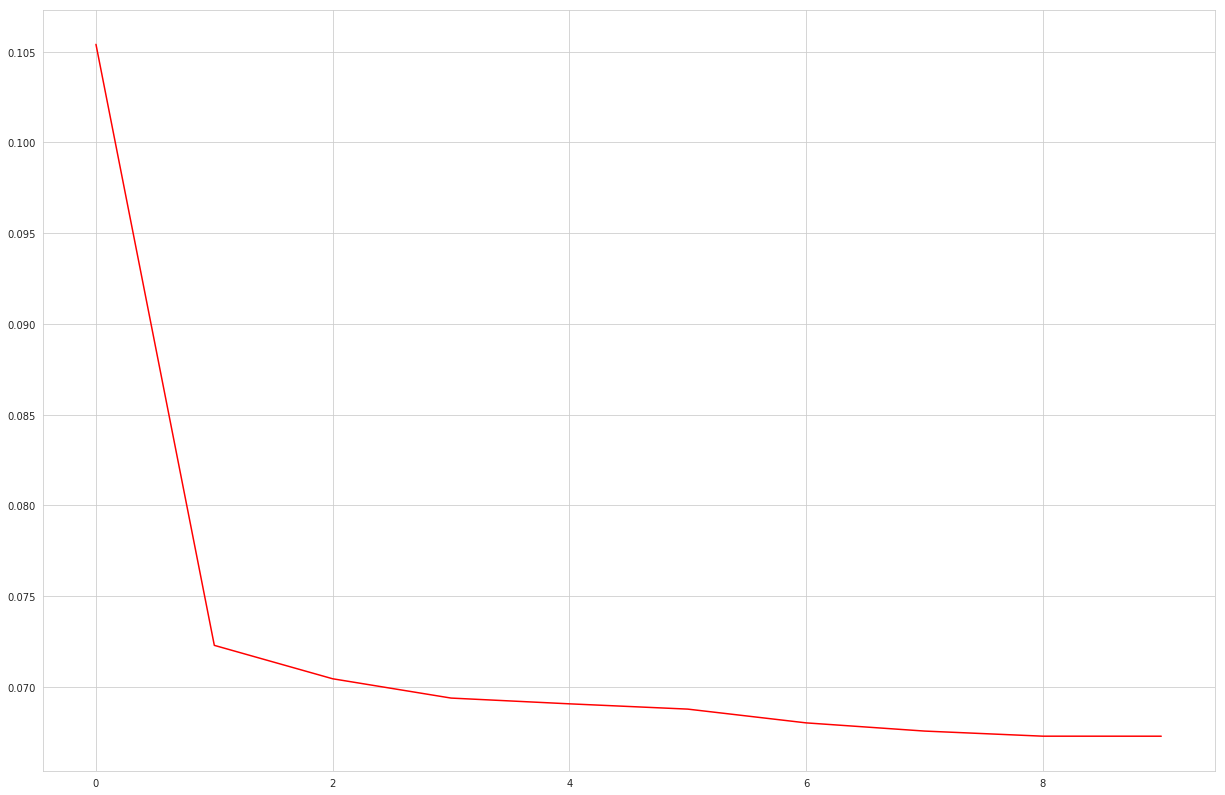

In [36]:
hidden_units = 10
activation = 'relu'
learning_rate = 0.01
batch_size = 32
class_weight = {
    0: 1,
    1: 1441 / 8559
}

model = models.Sequential()

model.add(layers.Dense(input_dim=8,
                       units=hidden_units,
                       activation=activation))

model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

history = model.fit(x_train_std,
                    y_train,
                    epochs=10,
                    batch_size=batch_size,
                    class_weight=class_weight)


test_acc = model.evaluate(x_test_std, y_test, batch_size=32)[1]*100
print("Test accuracy = %.2f %%" % (test_acc))

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

try to use three hidden layer(20 units) and Adam optimizer

Epoch 1/10
10000/10000 [==============================] - 2s 161us/step - loss: 0.3314 - acc: 0.7884
Epoch 2/10
10000/10000 [==============================] - 1s 89us/step - loss: 0.1360 - acc: 0.8559
Epoch 3/10
10000/10000 [==============================] - 1s 81us/step - loss: 0.1158 - acc: 0.8559
Epoch 4/10
10000/10000 [==============================] - 1s 70us/step - loss: 0.1115 - acc: 0.8559
Epoch 5/10
10000/10000 [==============================] - 1s 82us/step - loss: 0.1092 - acc: 0.8559
Epoch 6/10
10000/10000 [==============================] - 1s 81us/step - loss: 0.1051 - acc: 0.8559
Epoch 7/10
10000/10000 [==============================] - 1s 90us/step - loss: 0.0950 - acc: 0.8559
Epoch 8/10
10000/10000 [==============================] - 1s 82us/step - loss: 0.0854 - acc: 0.8559
Epoch 9/10
10000/10000 [==============================] - 1s 112us/step - loss: 0.0812 - acc: 0.8559
Epoch 10/10
2330/2330 [==============================] - 0s 105us/step
Test accuracy = 79.96 %


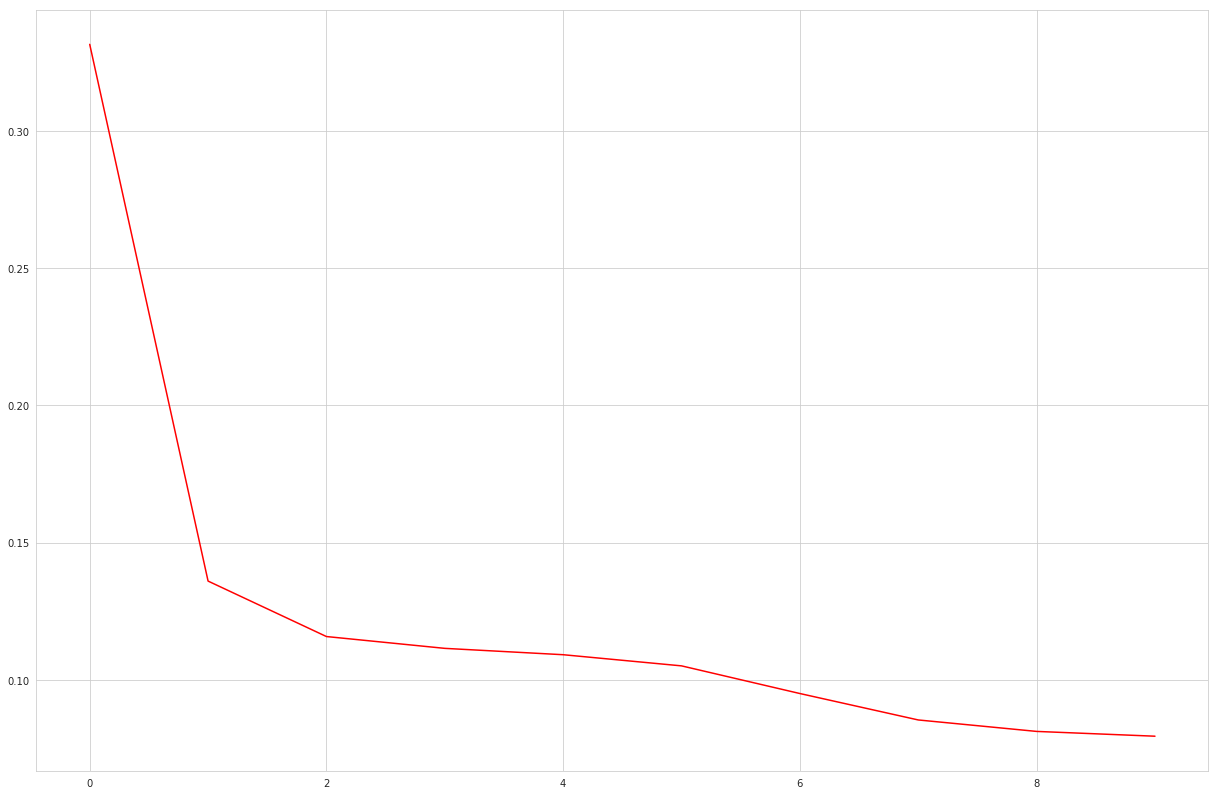

In [37]:
hidden_units = 10
activation = 'relu'
learning_rate = 0.01
batch_size = 32
class_weight = {
    0: 1,
    1: 1441 / 8559
}

model = models.Sequential()

model.add(layers.Dense(input_dim=8,
                       units=hidden_units,
                       activation=activation))

model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

history = model.fit(x_train_std,
                    y_train,
                    epochs=10,
                    batch_size=batch_size,
                    class_weight=class_weight)


test_acc = model.evaluate(x_test_std, y_test, batch_size=32)[1]*100
print("Test accuracy = %.2f %%" % (test_acc))

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

## Discussion
---
### Attributes
From the heat map, I find that some attributes have high relation with Revenue. But when I draw the bar graph of these attributes' relation with Revenued, I find that not every attributes can make a good classification. However, when I use Logistic Regression to predict, I get an oppisite result. The more attributes I use, the lower accuracy I get. So, I guess that these attributes may have some influence on each other, not just on Revenue.

### Models
To improve accuracy, I try three Models to predict Revenue.
* Logistic Regression
    * Using Logistic Model and Gradient Descent Model get the same accuracy. 
* SVM
    * use 4 types of kernel(linear, poly, rbf, sigmoid) to predict Revenue, and the linear kernel get the highest accuracy.
    * By modifing penalty, I find that when penalty = 8.3 ~ 9.1 can reaches the highest accuracy.
* Neural Network
    * I train this model serveral times, and I always get a low accuracy about 82% or even lower.
    * Tring to add more hidden layer to the model, but the accuracy does't get better.

In theory, Neural Network should get a higher accuracy, but after tring to fit the data and train the models, I get a lower accuracy on Neural Network.

I think the reason of this is attributes which I used are not good enough. Maybe I try other attributes can get a higher accuracy.

Another reason I think is the training and testing data. They may not balanced, so even I try hard to adjust the model I still can't get a higher accuracy.